In [15]:
import numpy as np
import pandas as pd

import scanpy as sc

from importlib import reload
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

%matplotlib inline

In [16]:
import benchmark_utils as bm

# Load Data

We recommend the use of scanpy Anndata objects as the preferred mode of loading and filtering data.

A sample dataset is provided and can be accessed using the ```load_data()``` method

In [17]:
from src.metacells.utils import load_data

In [18]:
ad = load_data()

# Pre-processing

todo

In [19]:
ad

AnnData object with n_obs × n_vars = 800 × 12464
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'DoubletScores', 'n_counts', 'leiden', 'phenograph', 'log_n_counts', 'celltype', 'Metacell'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DMEigenValues', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phenograph_colors', 'sample_colors', 'umap'
    obsm: 'DM_EigenVectors', 'X_FDL', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'connectivities', 'distances'

# Running Metacells

In [28]:
## User defined parameters

## Core parameters 
n_metacells = 10
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells
waypoint_proportion = 1 # Proportion of metacells to initialize using waypoint analysis, 
                        # the remainder of cells are selected by greedy selection




In [29]:
from src.metacells.core import Metacells

model = Metacells(ad, 
                  build_kernel_on=build_kernel_on, 
                  n_metacells=n_metacells, 
                  n_waypoint_eigs=n_waypoint_eigs)

In [30]:
model.fit(n_iter=8)

Building kernel...
Computing kNN graph...
Computing radius for adaptive bandwidth kernel...



Making graph symmetric...
Computing RBF kernel...



Building similarity LIL matrix...



Constructing CSR matrix...
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Initializing residual matrix using greedy column selection
Initializing f and g...



Selecting 9 cells from waypoint initialization.
Selecting 1 cells from greedy initialization.
Starting iteration 1 of 8
Completed iteration 1 of 8.
Starting iteration 2 of 8
Completed iteration 2 of 8.
Starting iteration 3 of 8
Completed iteration 3 of 8.
Starting iteration 4 of 8
Completed iteration 4 of 8.
Starting iteration 5 of 8
Completed iteration 5 of 8.
Starting iteration 6 of 8
Completed iteration 6 of 8.
Starting iteration 7 of 8
Completed iteration 7 of 8.
Starting iteration 8 of 8
Completed iteration 8 of 8.


# Accessing results

In [31]:
model.get_assignments()

,metacell_ID
index,
cd34_multiome_rep1#AAACAGCCACTCGCTC-1,cd34_multiome_rep1#CAAATCATCCGCTAGA-1
cd34_multiome_rep1#AAACAGCCACTGACCG-1,cd34_multiome_rep1#ATTTGTGAGGTTAGAG-1
cd34_multiome_rep1#AAACAGCCATAATCAC-1,cd34_multiome_rep1#CAAAGGATCGGTTCCT-1
cd34_multiome_rep1#AAACATGCAAATTCGT-1,cd34_multiome_rep1#ATTCCGGAGAAGGTGC-1
cd34_multiome_rep1#AAACATGCAGCATGTC-1,cd34_multiome_rep1#ATTGTGATCAAAGGCA-1
...,...
cd34_multiome_rep1#CAAATCATCCGCTAGA-1,cd34_multiome_rep1#CAAATCATCCGCTAGA-1
cd34_multiome_rep1#CAACAATGTACTGAAT-1,cd34_multiome_rep1#CAACAATGTACTGAAT-1
cd34_multiome_rep1#CAACAATGTCCAAGAC-1,cd34_multiome_rep1#ATTGCTCGTAAAGCGG-1


# Visualizing Results

PKG also implements methods for visualizing the results of the Metacells algorithm 
    <ul> 
        <li>```.plot_2D``` provides an interface for viewing metacell assignments on any 2-dimensional embedding in ad.obsm. Plots can also be coloured by metacell assignment.
        <li>```.plot_metacell_sizes``` can be used to view the distribution of number of cells assigned to each metacell
    </ul>
    
            

In [32]:
# Load the plotting functionality
import src.metacells.plot as plot

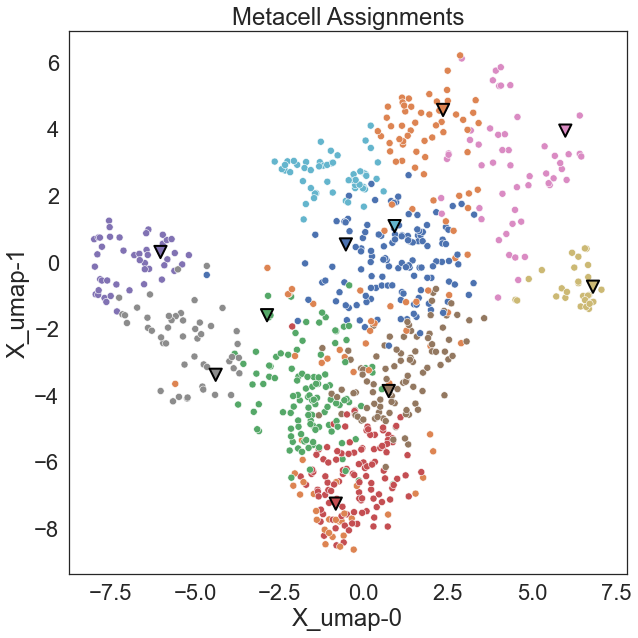

In [36]:
plot.plot_2D(ad, key='X_umap', colour_metacells=False)

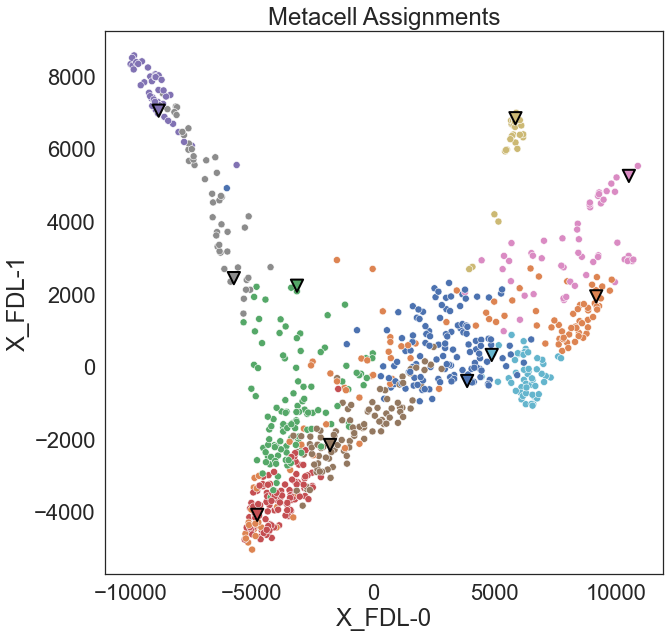

In [34]:
plot.plot_2D(ad, key = 'X_FDL', colour_metacells=True)

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


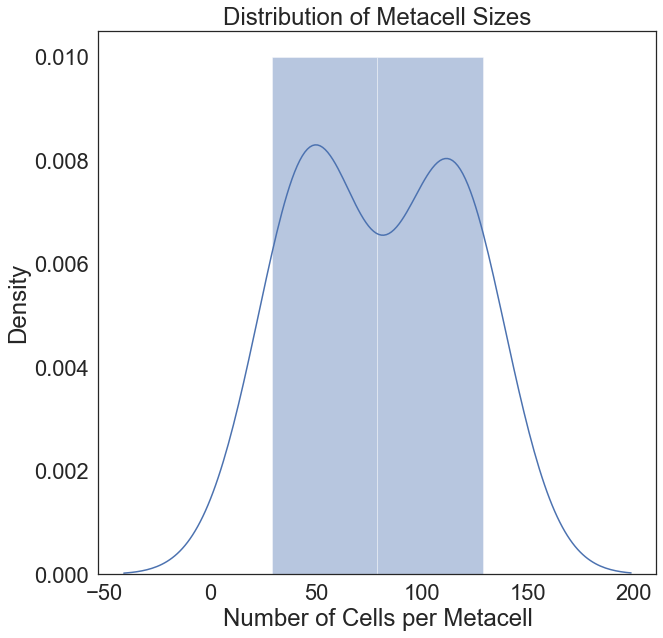

In [35]:
plot.plot_metacell_sizes(ad)